In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import keras.utils


In [4]:
from keras.utils import to_categorical

ImportError: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import random


ImportError: ignored

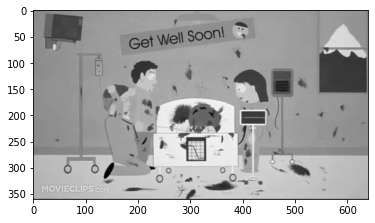

In [ ]:
DATADIR = "/content/drive/MyDrive/Moratuwa Project/Images/train"

CATEGORIES = ["blood", "bomb", "explosion", "fighting", "gunshoting", "hitting", "knife", 'non-violence']

for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  
    for img in os.listdir(path): 
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) 
        plt.imshow(img_array, cmap='gray') 
        plt.show() 

        break  
    break  

image pixel value. 0,255 kalata passe pixel values enwa. image eka hedila tiyena widiya,object eka tiyena widiya,shape eka etc. feature exraction

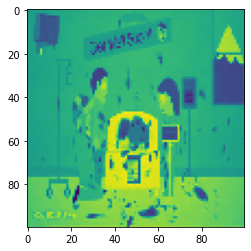

In [ ]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [ ]:
training_data = []

def create_training_data():
    for category in CATEGORIES:

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category) 

        for img in tqdm(os.listdir(path)): 
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) 
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
                training_data.append([new_array, class_num]) 
            except Exception as e:
                pass


create_training_data()

100%|██████████| 505/505 [02:31<00:00,  3.34it/s]


In [ ]:


random.shuffle(training_data)

In [ ]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)
y = to_categorical(y)

[[[[ 91]
   [ 91]
   [ 88]
   ...
   [176]
   [177]
   [176]]

  [[ 91]
   [ 91]
   [ 88]
   ...
   [176]
   [177]
   [177]]

  [[ 93]
   [ 91]
   [ 89]
   ...
   [179]
   [179]
   [179]]

  ...

  [[ 87]
   [ 86]
   [ 86]
   ...
   [103]
   [103]
   [102]]

  [[ 86]
   [ 85]
   [ 85]
   ...
   [102]
   [102]
   [102]]

  [[ 86]
   [ 85]
   [ 85]
   ...
   [102]
   [101]
   [100]]]]


In [ ]:
#no need to run again and agin.. because it saved
import pickle

pickle_out = open("/content/drive/MyDrive/Moratuwa Project/Images/ProjectCartoom_VideoPart-20210221T160036Z-001.zip (Unzipped Files)/ProjectCartoom_VideoPart/pickle/X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("/content/drive/MyDrive/Moratuwa Project/Images/ProjectCartoom_VideoPart-20210221T160036Z-001.zip (Unzipped Files)/ProjectCartoom_VideoPart/pickle/y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("/content/drive/MyDrive/Moratuwa Project/Images/ProjectCartoom_VideoPart-20210221T160036Z-001.zip (Unzipped Files)/ProjectCartoom_VideoPart/pickle/X.pickle","rb")
X = pickle.load(pickle_in)
 
pickle_in = open("/content/drive/MyDrive/Moratuwa Project/Images/ProjectCartoom_VideoPart-20210221T160036Z-001.zip (Unzipped Files)/ProjectCartoom_VideoPart/pickle/y.pickle","rb")
y = pickle.load(pickle_in)
y = to_categorical(y)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import pickle
import time
 
NAME = "TEST-CNN"
 

 
X = X/255.0

 
model = Sequential()
 
model.add(Conv2D(32, (3, 3), input_shape=(100,100,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))


model.add(Flatten())  
 

 
model.add(Dense(8))
model.add(Activation('softmax'))
 
#tensorboard = TensorBoard(log_dir="/content/drive/MyDrive/Moratuwa Project/Images/ProjectCartoom_VideoPart-20210221T160036Z-001.zip (Unzipped Files)/ProjectCartoom_VideoPart/Logs/{}".format(NAME))

#file_writer = tf.summary.create_file_writer(logdir)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=  [tf.keras.metrics.BinaryAccuracy(name='accuracy')])


 
history = model.fit(X, y,
          batch_size=32,
          epochs=10,
          validation_split=0.2)

 
model.save(f"/content/drive/MyDrive/Moratuwa Project/Images/new_image_model.h5")

Epoch 1/10
105/105 [==============================] - 2s 16ms/step - loss: 2.0812 - accuracy: 0.8748 - val_loss: 1.9810 - val_accuracy: 0.8750
Epoch 2/10
105/105 [==============================] - 1s 14ms/step - loss: 1.9582 - accuracy: 0.8751 - val_loss: 1.8679 - val_accuracy: 0.8783
Epoch 3/10
105/105 [==============================] - 1s 14ms/step - loss: 1.8450 - accuracy: 0.8775 - val_loss: 1.7988 - val_accuracy: 0.8808
Epoch 4/10
105/105 [==============================] - 1s 14ms/step - loss: 1.7196 - accuracy: 0.8811 - val_loss: 1.7603 - val_accuracy: 0.8808
Epoch 5/10
105/105 [==============================] - 1s 14ms/step - loss: 1.6794 - accuracy: 0.8816 - val_loss: 1.7200 - val_accuracy: 0.8814
Epoch 6/10
105/105 [==============================] - 1s 14ms/step - loss: 1.6136 - accuracy: 0.8850 - val_loss: 1.6848 - val_accuracy: 0.8819
Epoch 7/10
105/105 [==============================] - 1s 14ms/step - loss: 1.5143 - accuracy: 0.8895 - val_loss: 1.7044 - val_accuracy: 0.8828

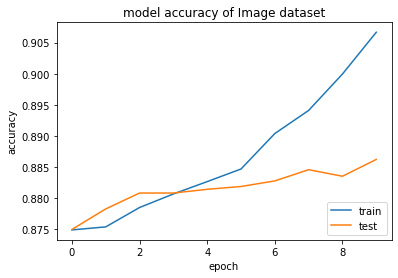

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy of Image dataset')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

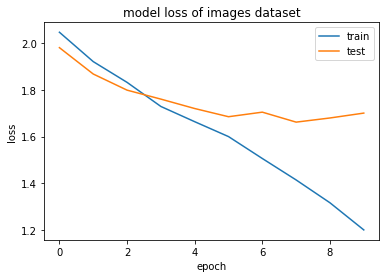

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss of images dataset')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])

plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [ ]:
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])

plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [ ]:
import tensorflow

In [ ]:
image_path = '/content/drive/MyDrive/Moratuwa Project/Images/train/non-violence/non_violence (102).jpg' 
IMG_SIZE = 100
model_path = '/content/drive/MyDrive/Moratuwa Project/Images/new_image_model.h5'

img_array = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
new_array = new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

model = tensorflow.keras.models.load_model(model_path)

prediction = model.predict(new_array)

print(prediction)

[[0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [ ]:
classes = np.argmax(prediction, axis = 1)
print(classes)
value = classes[0]
print(value)

[5]
5


In [ ]:
str_val = CATEGORIES[value]
print(str_val)

gunshoting


In [ ]:
values_dict = {'blood':5, 'bomb':3, 'electricshock': 1, 'explosion':3, 'fighting': 3, 'gunshoting':4, 'hitting':2, 'knife':2}

tv = values_dict.get(str_val)
tv

4